<a href="https://colab.research.google.com/github/jiorjioo/CFDS2022/blob/main/CFDS_Week_3_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [4]:
df = pd.read_csv("/content/automobile_dataset.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Missing Values

## Cek Missing Values

In [5]:
df.info() # supaya tau jumlah data, missing value, dll.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
# ubah '?' ke NaN. NaN adalah default dari missing value di Python
df.replace("?", np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
# cek missing value-nya di mana aja
missing_data = df.isnull()
missing_data.head()

# True = missing value

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
for column in missing_data.columns:
  print("Column name: ", column)
  print(missing_data[column].value_counts())
  print("")

Column name:  symboling
False    205
Name: symboling, dtype: int64

Column name:  normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

Column name:  make
False    205
Name: make, dtype: int64

Column name:  fuel-type
False    205
Name: fuel-type, dtype: int64

Column name:  aspiration
False    205
Name: aspiration, dtype: int64

Column name:  num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

Column name:  body-style
False    205
Name: body-style, dtype: int64

Column name:  drive-wheels
False    205
Name: drive-wheels, dtype: int64

Column name:  engine-location
False    205
Name: engine-location, dtype: int64

Column name:  wheel-base
False    205
Name: wheel-base, dtype: int64

Column name:  length
False    205
Name: length, dtype: int64

Column name:  width
False    205
Name: width, dtype: int64

Column name:  height
False    205
Name: height, dtype: int64

Column name:  curb-weight
False    205
Name: curb-weight, dtype: int64

Co

In [9]:
# cara lain cek kolom missing value
for column in missing_data.columns:
  print(column, " : ", missing_data[column].sum())

symboling  :  0
normalized-losses  :  41
make  :  0
fuel-type  :  0
aspiration  :  0
num-of-doors  :  2
body-style  :  0
drive-wheels  :  0
engine-location  :  0
wheel-base  :  0
length  :  0
width  :  0
height  :  0
curb-weight  :  0
engine-type  :  0
num-of-cylinders  :  0
engine-size  :  0
fuel-system  :  0
bore  :  4
stroke  :  4
compression-ratio  :  0
horsepower  :  2
peak-rpm  :  2
city-mpg  :  0
highway-mpg  :  0
price  :  4


## Handle Missing Values per kolom

### **normalized-losses**

(array([17., 46., 31., 20., 21., 18.,  9.,  0.,  1.,  1.]),
 array([ 65. ,  84.1, 103.2, 122.3, 141.4, 160.5, 179.6, 198.7, 217.8,
        236.9, 256. ]),
 <a list of 10 Patch objects>)

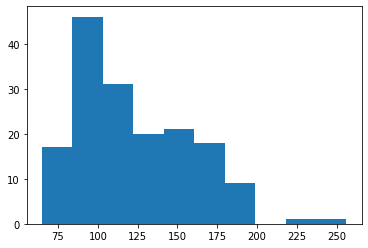

In [10]:
plt.hist(df['normalized-losses'].astype(float), bins = 10)

In [13]:
# hitung mean
mean_norm_loss = df['normalized-losses'].astype("float").mean(axis=0) # axis = 0 artinya ingin menghitung dari row
print("Rata-rata: ", mean_norm_loss)

# hitung median
median_norm_loss = df['normalized-losses'].astype("float").median(axis=0)
print("Median: ", median_norm_loss)

Rata-rata:  122.0
Median:  115.0


In [14]:
# replace NaN dengan median value
df['normalized-losses'].replace(np.nan, median_norm_loss, inplace = True)

In [15]:
df['normalized-losses'].isnull().sum()

0

### **num-of-doors**

In [17]:
# karena datanya kategorikal, jadi cek dulu jumlahnya
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [16]:
# karena datanya kategorikal, untuk handle missing-value bisa pakai metode cari modusnya
df['num-of-doors'].value_counts().idxmax() # mencari index yang memiliki nilai maksimum

'four'

In [20]:
# cara lain cari modus, pakai fungsi mode()
modus = df['num-of-doors'].mode()
modus

0    four
dtype: object

In [21]:
df['num-of-doors'].replace(np.nan, "four", inplace=True)

In [22]:
# cek lagi apakah masih ada nilai null atau tidak
df['num-of-doors'].isnull().sum()

0

In [23]:
df['num-of-doors'].value_counts()

four    116
two      89
Name: num-of-doors, dtype: int64

### **bore**

In [24]:
df['bore'].head()

0    3.47
1    3.47
2    2.68
3    3.19
4    3.19
Name: bore, dtype: object

(array([ 1.,  1.,  8., 37., 40., 24., 27., 42., 17.,  4.]),
 array([2.54, 2.68, 2.82, 2.96, 3.1 , 3.24, 3.38, 3.52, 3.66, 3.8 , 3.94]),
 <a list of 10 Patch objects>)

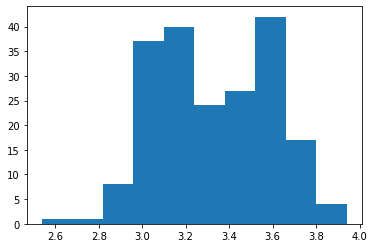

In [26]:
plt.hist(df['bore'].astype(float), bins = 10)

In [28]:
# karena distribusinya normal, pake mean
mean_bore = df['bore'].astype("float").mean()
print("Rata-rata: ", mean_bore)

Rata-rata:  3.3297512437810957


In [29]:
df['bore'].replace(np.nan, mean_bore, inplace = True)

In [30]:
df['bore'].isnull().sum()

0

### **horsepower**

(array([55., 49., 49., 13., 23.,  8.,  4.,  0.,  1.,  1.]),
 array([ 48.,  72.,  96., 120., 144., 168., 192., 216., 240., 264., 288.]),
 <a list of 10 Patch objects>)

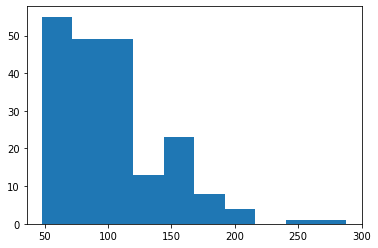

In [31]:
plt.hist(df['horsepower'].astype(float), bins=10)

In [32]:
median_horsepower = df['horsepower'].astype('float').median(axis=0)
print("Median: ", median_horsepower)
df['horsepower'].replace(np.nan, median_horsepower, inplace=True)

Median:  95.0


### **peak-rpm**

(array([17., 10., 41., 31., 31., 51.,  8., 12.,  0.,  2.]),
 array([4150., 4395., 4640., 4885., 5130., 5375., 5620., 5865., 6110.,
        6355., 6600.]),
 <a list of 10 Patch objects>)

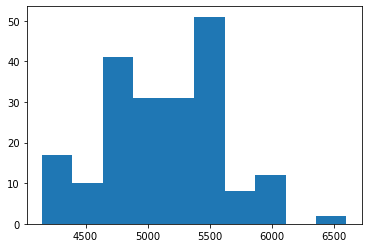

In [33]:
plt.hist(df['peak-rpm'].astype(float), bins=10)

In [34]:
mean_peakrpm = df['peak-rpm'].astype('float').mean(axis=0)
print("Rata-rata: ", mean_peakrpm)
df['peak-rpm'].replace(np.nan, mean_peakrpm, inplace=True)

Rata-rata:  5125.369458128079


### **price**

In [35]:
# hapus row dimana price = NaN
df.dropna(subset=['price'], axis=0, inplace=True)

# reset index
df.reset_index(drop=True, inplace = True)

In [36]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Data Formatting

In [37]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [38]:
# ubah tipe data

df[['bore', 'stroke']] = df[['bore', 'stroke']].astype("float")
df[['normalized-losses']] = df[['normalized-losses']].astype("int")
df[['price']] = df[['price']].astype("float")
df[['peak-rpm']] = df[['peak-rpm']].astype("float")

## Normalisasi
ex: kita ingin menormalisasi kolom 'length' dan 'width' sehingga memiliki range dari 0 sampai 1

(array([ 3.,  3., 27., 23., 54., 37., 23., 20.,  8.,  3.]),
 array([141.1, 147.8, 154.5, 161.2, 167.9, 174.6, 181.3, 188. , 194.7,
        201.4, 208.1]),
 <a list of 10 Patch objects>)

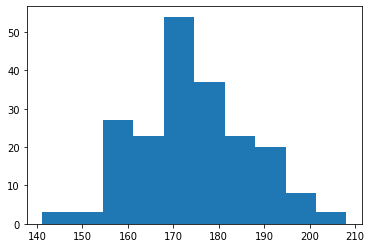

In [39]:
plt.hist(df['length'].astype(float), bins=10)

In [40]:
min_length = df['length'].min()
range_length = df['length'].max() - min_length
df['length'] = (df['length'] - min_length)/range_length

min_width = df['width'].min()
range_width = df['width'].max() - min_width
df['width'] = df['width'] - min_width/range_width

(array([ 3.,  3., 27., 23., 54., 37., 23., 20.,  8.,  3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

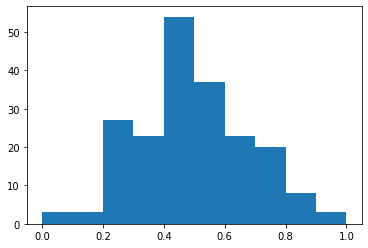

In [41]:
plt.hist(df['length'].astype(float), bins=10)

## One Hot Encoding / Dummy Variable
mengubah data kategorikal ke bentuk angka

In [42]:
df['fuel-type'].value_counts()


gas       181
diesel     20
Name: fuel-type, dtype: int64

In [43]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [46]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel' : 'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [47]:
# merge dataframe "df" & "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis = 1)

# drop kolom 'fuel-type'
df.drop("fuel-type", axis=1, inplace=True)


In [48]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas
0,3,115,alfa-romero,std,two,convertible,rwd,front,88.6,0.413433,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,0,1
1,3,115,alfa-romero,std,two,convertible,rwd,front,88.6,0.413433,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,0,1
2,1,115,alfa-romero,std,two,hatchback,rwd,front,94.5,0.449254,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.529851,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.529851,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,0,1
